<a href="https://colab.research.google.com/github/ChakritKammason/DPDM/blob/master/DWDM_Project_By_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [321]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
base_path = '/content/drive/My Drive/DWDM_Material'
os.listdir(base_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['teach.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'Copy of search_click.csv',
 'Copy of w_restaurant.csv',
 'metadata.xlsx',
 'Preprocessing02.html',
 'reduced_marketbasket.csv',
 'search_click.csv',
 'teach02.csv',
 'test.csv',
 'w_restaurant.csv',
 'AnimalsPlague.csv',
 '666d790734bee7737c0b5144c462b9b5.jpg',
 'AnimalPlague.csv',
 'AnimalsCorn.csv',
 'Local.csv',
 'AnimalCorn.csv',
 'Local.xlsx',
 'AnimalCorn.xlsx']

#Data Preprocessing

ข้อมูล ผลผลิตข้าวโพดเลี้ยงสัตว์แยกตามจังหวัด ปี 2562 จาก สำนักงานเศรษฐกิจการเกษตร https://data.go.th/dataset/corn62
ข้อมูล ข้อมูลโรคระบาดสัตว์ในประเทศไทย จาก กรมปศุสัตว์ https://data.go.th/dataset/item_b52f3c1a-01a0-4ea7-9df1-0a23da60d944
ข้อมูลภูมิภาค จาก wikipedia

In [322]:
AnimalsCorn = os.path.join(base_path,'AnimalCorn.xlsx')
AnimalsPlagues = os.path.join(base_path,'AnimalPlague.csv')
local = os.path.join(base_path,'Local.xlsx')

In [323]:
AnimalCorn_df = pd.read_excel(AnimalsCorn)
AnimalsPlagues_df = pd.read_csv(AnimalsPlagues)
local_df = pd.read_excel(local)

In [324]:
AnimalCorn_df.head()

,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,เพชรบูรณ์,663268,0.1303,848251,781.92
1,นครราชสีมา,549088,0.1078,707300,776.32
2,น่าน,460954,0.0905,665244,692.91
3,ตาก,416351,0.0818,565063,736.82
4,เลย,345580,0.0679,484694,712.99


In [325]:
AnimalsPlagues_df.head()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด
0,กระบี่,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,กาญจนบุรี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,กาฬสินธุ์,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
4,กำแพงเพชร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3


In [326]:
local_df.head()

,จังหวัด,ภูมิภาค
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ
1,บึงกาฬ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ


รวมตาราง โดยใช้จังหวัดเป็นตัวเชื่อม

In [327]:
table = pd.merge(AnimalsPlagues_df,AnimalsCorn_df,on='จังหวัด')

In [328]:
#ACPL = pd.merge(ACP,local_df,on='จังหวัด')
#table = AnimalsCorn_df.merge(AnimalsPlagues_df,how='left',left_on='จังหวัด',right_on='จังหวัด')
table.head()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,กาญจนบุรี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"62,179",1%,"83,951",740.66
1,กาฬสินธุ์,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,"3,572",0%,"5,970",598.32
2,กำแพงเพชร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3,"63,371",1%,"84,667",748.47
3,ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"6,963",0%,"10,475",664.73
4,จันทบุรี,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,"8,589",0%,"11,737",731.79


# Missing Value กำจัดค่า Missing 


In [329]:
table.isnull()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,False,True,True,True,True,True,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False
1,False,True,True,True,True,False,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
2,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True,True,True,False,False,False,False,False
3,False,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False
4,False,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
5,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
6,False,True,True,True,False,False,True,True,False,True,True,False,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False
7,False,True,True,True,True,True,True,True,False,True,False,False,True,False,True,True,True,True,True,False,True,True,False,False,False,False,False
8,False,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False
9,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False


In [330]:
table.isnull().any()

จังหวัด                                   False
Coccidiosis, Infectious Bursal Disease     True
Duck plague                                True
ข้อและสมองอักเสบ (ซีเออี)                  True
คอบวม                                      True
บรูเซลโลซิส                                True
แบล็กเลกหรือโรคไข้ขาดำ                     True
ปากและเท้าเปื่อย ไทป์เอ                    True
ปากและเท้าเปื่อย ไทป์โอ                    True
ปากและเท้าเปื่อย ไทป์โอและเอ               True
ปากและเท้าเปื่อย ไม่ทราบไทป์               True
ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง            True
พิษสุนัขบ้า                                True
พี อาร์ อาร์ เอส                           True
พี อาร์ อาร์ เอส                           True
พี อาร์ อาร์ เอส + อหิวาต์สุกร             True
พี อาร์ อาร์ เอส + อหิวาต์สุกร             True
พี อี ดี                                   True
มงคล่อเทียม                                True
โรคทูเบอร์คูโลซิส                          True
โรคมงคล่อเทียม                          

In [331]:
table.isnull().any().any()

True

In [332]:
table1 = table.fillna(0) #เติมค่า missing เป็น 0

In [333]:
table1.head()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
0,กาญจนบุรี,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"62,179",1%,"83,951",740.66
1,กาฬสินธุ์,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,"3,572",0%,"5,970",598.32
2,กำแพงเพชร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3,"63,371",1%,"84,667",748.47
3,ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,"6,963",0%,"10,475",664.73
4,จันทบุรี,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"8,589",0%,"11,737",731.79


In [334]:
table1.isnull().any()

จังหวัด                                   False
Coccidiosis, Infectious Bursal Disease    False
Duck plague                               False
ข้อและสมองอักเสบ (ซีเออี)                 False
คอบวม                                     False
บรูเซลโลซิส                               False
แบล็กเลกหรือโรคไข้ขาดำ                    False
ปากและเท้าเปื่อย ไทป์เอ                   False
ปากและเท้าเปื่อย ไทป์โอ                   False
ปากและเท้าเปื่อย ไทป์โอและเอ              False
ปากและเท้าเปื่อย ไม่ทราบไทป์              False
ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง           False
พิษสุนัขบ้า                               False
พี อาร์ อาร์ เอส                          False
พี อาร์ อาร์ เอส                          False
พี อาร์ อาร์ เอส + อหิวาต์สุกร            False
พี อาร์ อาร์ เอส + อหิวาต์สุกร            False
พี อี ดี                                  False
มงคล่อเทียม                               False
โรคทูเบอร์คูโลซิส                         False
โรคมงคล่อเทียม                          

In [335]:
table1.shape

(46, 27)

In [336]:
table1.isnull().any().any()

False

In [337]:
#table2 = table1.merge(local_df,how='left',left_on='จังหวัด',right_on='จังหวัด')
table2 = pd.merge(table1,local_df,on='จังหวัด')
table2.head()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),ภูมิภาค
0,กาญจนบุรี,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"62,179",1%,"83,951",740.66,ตะวันตก
1,กาฬสินธุ์,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,"3,572",0%,"5,970",598.32,ตะวันออกเฉียงเหนือ
2,ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,"6,963",0%,"10,475",664.73,ตะวันออกเฉียงเหนือ
3,จันทบุรี,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"8,589",0%,"11,737",731.79,ตะวันออก
4,ฉะเชิงเทรา,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,"1,402",0%,"1,923",729.07,ตะวันออก


In [338]:
table2.isnull()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),ภูมิภาค
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [339]:
table2.isnull().any().any()

False

In [340]:
table2.dropna()

,จังหวัด,"Coccidiosis, Infectious Bursal Disease",Duck plague,ข้อและสมองอักเสบ (ซีเออี),คอบวม,บรูเซลโลซิส,แบล็กเลกหรือโรคไข้ขาดำ,ปากและเท้าเปื่อย ไทป์เอ,ปากและเท้าเปื่อย ไทป์โอ,ปากและเท้าเปื่อย ไทป์โอและเอ,ปากและเท้าเปื่อย ไม่ทราบไทป์,ปากและเท้าเปื่อย ไม่ส่งตัวอย่าง,พิษสุนัขบ้า,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อาร์ อาร์ เอส + อหิวาต์สุกร,พี อี ดี,มงคล่อเทียม,โรคทูเบอร์คูโลซิส,โรคมงคล่อเทียม,อหิวาต์สุกร,ผลรวมทั้งหมด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),ภูมิภาค
0,กาญจนบุรี,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"62,179",1%,"83,951",740.66,ตะวันตก
1,กาฬสินธุ์,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,"3,572",0%,"5,970",598.32,ตะวันออกเฉียงเหนือ
2,ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,"6,963",0%,"10,475",664.73,ตะวันออกเฉียงเหนือ
3,จันทบุรี,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"8,589",0%,"11,737",731.79,ตะวันออก
4,ฉะเชิงเทรา,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,"1,402",0%,"1,923",729.07,ตะวันออก
5,ชัยภูมิ,0.0,0.0,0.0,1.0,9.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,"78,162",2%,"107,132",729.59,ตะวันออกเฉียงเหนือ
6,เชียงราย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,25,"294,008",6%,"388,569",756.64,เหนือ
7,เชียงใหม่,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,"131,366",3%,"173,910",755.37,เหนือ
8,ตาก,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,"416,351",8%,"565,063",736.82,ตะวันตก
9,นครพนม,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,558,0%,812,687.19,ตะวันออกเฉียงเหนือ


In [345]:
table3 = table2[['จังหวัด', 'ผลผลิต(ตัน)', 'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)', 'ผลรวมทั้งหมด','ภูมิภาค']] #เลือก collum ที่ต้องการนำไปวิเคราะห์ผล
table3

,จังหวัด,ผลผลิต(ตัน),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),ผลรวมทั้งหมด,ภูมิภาค
0,กาญจนบุรี,"62,179",740.66,4,ตะวันตก
1,กาฬสินธุ์,"3,572",598.32,22,ตะวันออกเฉียงเหนือ
2,ขอนแก่น,"6,963",664.73,3,ตะวันออกเฉียงเหนือ
3,จันทบุรี,"8,589",731.79,6,ตะวันออก
4,ฉะเชิงเทรา,"1,402",729.07,30,ตะวันออก
5,ชัยภูมิ,"78,162",729.59,14,ตะวันออกเฉียงเหนือ
6,เชียงราย,"294,008",756.64,25,เหนือ
7,เชียงใหม่,"131,366",755.37,16,เหนือ
8,ตาก,"416,351",736.82,1,ตะวันตก
9,นครพนม,558,687.19,3,ตะวันออกเฉียงเหนือ


In [346]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

{'boxes': [<matplotlib.lines.Line2D at 0x7fc4d99ff080>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc4d99ffa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4d9989550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4d99891d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc4d99ff390>,
  <matplotlib.lines.Line2D at 0x7fc4d99ff710>]}

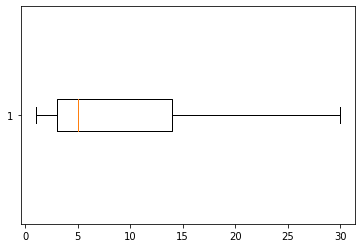

In [347]:
plt.boxplot(table2['ผลรวมทั้งหมด'],vert=False) #สร้าง boxplot ของผลรวมการเกิดโรคของสัตว์

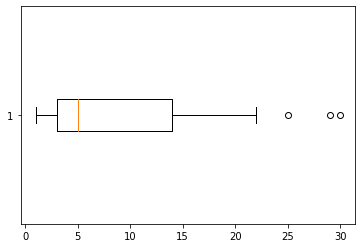

In [348]:
ret = plt.boxplot(table2['ผลรวมทั้งหมด'],whis=0.8,vert=False) 

In [349]:
ret['whiskers']

In [350]:
print(ret['whiskers'][0].get_xdata()) #เพื่อหาขอบเขตมากสุดและน้อยสุดของ whiskers
print(ret['whiskers'][1].get_xdata())

[3. 1.]
[14. 22.]


In [351]:
x = [table3['ผลรวมทั้งหมด']] #สร้าง histrogram
y = [table3['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)']]

(array([15.,  9.,  3.,  2.,  4.,  3.,  2.,  1.,  1.,  2.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

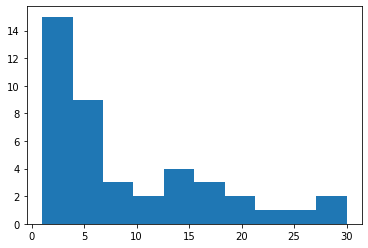

In [352]:
plt.hist(x)

(array([ 1.,  0.,  0.,  1.,  3., 11., 15.,  8.,  2.,  1.]),
 array([452.32 , 494.943, 537.566, 580.189, 622.812, 665.435, 708.058,
        750.681, 793.304, 835.927, 878.55 ]),
 <a list of 10 Patch objects>)

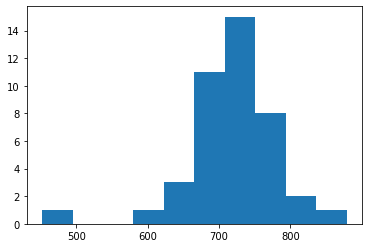

In [353]:
plt.hist(y)

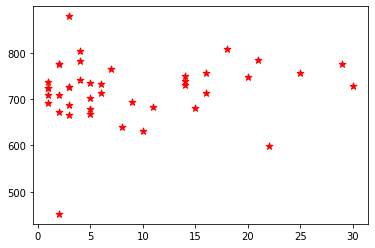

In [354]:
plt.scatter(table3['ผลรวมทั้งหมด'],table3['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'],marker='*',s=50,c='r')

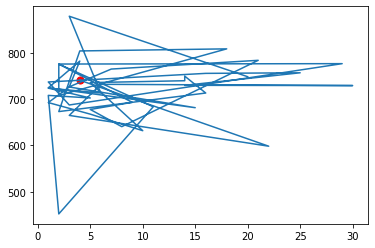

In [355]:
plt.plot(table3['ผลรวมทั้งหมด'],table3['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'])
plt.scatter(table3['ผลรวมทั้งหมด'][0],table3['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)'][0],s=50,c='r')

# Classification

In [356]:
X = table3[['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)','ผลรวมทั้งหมด',]] # แบ่งกลุ่มของ X
X.shape

(42, 2)

In [357]:
y = table3[['ภูมิภาค']] # แบ่งกลุ่มของ Y
y

,ภูมิภาค
0,ตะวันตก
1,ตะวันออกเฉียงเหนือ
2,ตะวันออกเฉียงเหนือ
3,ตะวันออก
4,ตะวันออก
5,ตะวันออกเฉียงเหนือ
6,เหนือ
7,เหนือ
8,ตะวันตก
9,ตะวันออกเฉียงเหนือ


แบ่งข้อมูล ออกเป็น 2 ส่วน train และ test ใช้ train เพื่อเลือกโมเดลที่ทำงานได้แม่นยำที่สุดกับ Test Set 

In [358]:
X_train = X.iloc[:-2,:] 
print(X_train.shape)

(40, 2)


In [359]:
X_test = X.iloc[-2:,:]
X_test

,ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),ผลรวมทั้งหมด
40,878.55,3
41,748.16,20


In [360]:
y_train = y.iloc[:-2]
y_train.shape

(40, 1)

In [361]:
y_test = y.iloc[-2:]
y_test

,ภูมิภาค
40,กลาง
41,ตะวันออกเฉียงเหนือ


#KNN

ใช้ในการจัดแบ่งคลาส โดยเทคนิคนี้จะตัดสินใจว่า คลาสใดที่จะแทนเงื่อนไขหรือกรณีใหม่ๆ ได้บ้าง โดยการตรวจสอบจำนวนบางจำนวน (“K” ในขั้นตอนวิธีการเพื่อนบ้านใกล้ที่สุด)

In [362]:
from sklearn.neighbors import KNeighborsClassifier

In [363]:
myKNN = KNeighborsClassifier(n_neighbors=20) #มองหาจำนวนเพื่อนบ้าน = 20

In [364]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [365]:
myKNN.predict(X_test)

array(['กลาง', 'เหนือ'], dtype=object)

In [366]:
myKNN = KNeighborsClassifier(n_neighbors=30) #มองหาจำนวนเพื่อนบ้าน = 30

In [368]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [369]:
myKNN.predict(X_test)

array(['เหนือ', 'เหนือ'], dtype=object)

In [370]:
myKNN = KNeighborsClassifier(n_neighbors=30,weights='distance') #มองหาจำนวนเพื่อนบ้าน = 30 Distance คือ ระยะห่าง 
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='distance')

In [371]:
myKNN.predict(X_test)

array(['เหนือ', 'เหนือ'], dtype=object)

In [372]:
myKNN = KNeighborsClassifier(n_neighbors=10)

In [373]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [374]:
myKNN.predict(X_test)

array(['กลาง', 'เหนือ'], dtype=object)

In [303]:
myKNN = KNeighborsClassifier(n_neighbors=15)

In [375]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [376]:
myKNN.predict(X_test)

array(['กลาง', 'เหนือ'], dtype=object)

In [377]:
myKNN.predict_proba(X_test)

array([[0.4, 0. , 0.2, 0.1, 0.3],
       [0.1, 0.1, 0.2, 0.1, 0.5]])

#เลือกโมเดล

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #test_size ขนาดของจำนวน test

In [380]:
print(f'{X_train.shape} {X_test.shape}')

(33, 2) (9, 2)


In [310]:
from sklearn.model_selection import cross_val_score

In [381]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=3)
#2. cros validation
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.5761904761904761

In [382]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=10,weights='uniform')
#2. cros validation
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.5095238095238095

In [383]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=15,weights='uniform')
#2. cros validation
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.5142857142857142

In [384]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=20,weights='uniform')
#2. cros validation
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.48571428571428577

In [385]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=20,weights='distance')
#2. cros validation
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.48571428571428565

# Train model ที่ดีที่สุดด้วย training set แล้ววัดผลด้วย test set

In [386]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=15,weights='uniform')
#2. train
KNN_k3_wU.fit(X_train,y_train)
#3. test_Evaluation
KNN_k3_wU.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.3333333333333333

data ผลผลิตข้าโพด ต่อ การเกิดโรคของสัตว์ แยกตามจังหวัด โมเดลที่แม่นยำที่สุดคือ knn test โมเดลที่มีความแม่นยำที่สุด โดยมีพารามิเตอร์ K = 15 มีความแม่นยำ = 0.3%